In [ ]:
# Test your Gemini API
import google.generativeai as genai
from google.colab import userdata

# Get your API key from Colab Secrets Manager
api_key = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=api_key)

# Use a supported model for generating content
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content("Say hello to MGMT 599!")
print(response.text)

Hello MGMT 599!  I'm ready to assist with any questions or tasks related to the course.  Let me know what you need.



In [ ]:
# Use this prompt with Gemini
prompt1 = """
I have a retail dataset called Superstore, uploaded as `superstore_dataset.csv`, with columns including:
Sales, Profit, Quantity, Discount, Category, Sub-Category,
Customer ID, Segment, Region, State, City, Order Date, Ship Date

As a retail analyst, what are the 5 most important business questions
I should investigate with this data? For each question, explain why
it matters and which columns I should analyze.
"""
response = model.generate_content(prompt1)
print(response.text)

As a retail analyst working with the Superstore dataset, here are 5 important business questions I would investigate, along with their importance and the relevant columns:

**1. What are the most profitable product categories and sub-categories?**

* **Why it matters:**  Understanding profitability at the product level is crucial for inventory management, marketing spend, and strategic product development.  Identifying high-performing categories allows for resource allocation to maximize returns and potentially phase out underperforming ones.

* **Columns to analyze:** `Category`, `Sub-Category`, `Sales`, `Profit`, `Quantity`, `Discount`.  We'll need to calculate metrics like profit margin (`Profit`/`Sales`) per category and sub-category, perhaps considering quantity sold to understand volume vs. margin trade-offs.

**2. Which customer segments are most valuable?**

* **Why it matters:**  Different customer segments have different needs and buying behaviors.  Understanding the profitab

# Task
Analyze and provide a graph for results using "superstore_dataset.csv": **Columns to analyze:** `Category`, `Sub-Category`, `Sales`, `Profit`, `Quantity`, `Discount`. Calculate profit margins (`Profit` / `Sales`) for each category and sub-category.

## Load data

### Subtask:
Load the `superstore_dataset.csv` file into a pandas DataFrame.


**Reasoning**:
The first step is to load the data from the CSV file into a pandas DataFrame, which is required to perform any analysis.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/superstore_dataset.csv')

# Display the first 5 rows
display(df.head())

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [ ]:
# Calculate profit margin
df['profit_margin'] = df['profit'] / df['sales']

# Display the first 5 rows with the new column
display(df.head())

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


# Task
Analyze the data quality of the file "superstore_dataset.csv" by calculating basic statistics and using them to generate a prompt for the Gemini model to identify potential data quality issues and suggest validation queries.

## Calculate basic statistics

### Subtask:
Calculate basic statistics for the `superstore_dataset.csv` file.


**Reasoning**:
Calculate basic statistics for the dataframe, including information about the columns, descriptive statistics for numerical columns, and counts of unique and missing values, to assess data quality.



In [ ]:
# Display concise summary of the DataFrame
df.info()

# Generate descriptive statistics for numerical columns
display(df.describe())

# Count the number of unique values in each column
display(df.nunique())

# Count the number of missing values in each column
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

,zip,discount,profit,quantity,sales,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.225110,623.245101,0.466754
min,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000
25%,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000
50%,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000
75%,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500
max,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000


,0
order_id,5009
order_date,1236
ship_date,1334
customer,793
manufactory,182
product_name,1849
segment,3
category,3
subcategory,17
region,4


,0
order_id,0
order_date,0
ship_date,0
customer,0
manufactory,0
product_name,0
segment,0
category,0
subcategory,0
region,0


## Generate prompt

### Subtask:
Generate a prompt including the calculated statistics.


**Reasoning**:
Construct the prompt for the Gemini model based on the calculated statistics and the instructions.



In [ ]:
prompt = f"""
As a data quality analyst, analyze the following statistics from the Superstore dataset and identify potential data quality issues. Suggest SQL validation queries to check for these issues, assuming the data is in a table named `superstore`.

Dataset Statistics:
- Number of rows: 9994
- Number of columns: 19
- Data types: Mix of object (strings), int64, and float64.
- Descriptive statistics for numerical columns:
{df.describe().to_markdown()}
- Count of unique values per column:
{df.nunique().to_markdown()}
- Sum of null values per column:
{df.isnull().sum().to_markdown()}

Based on these statistics, what potential data quality issues can you identify and what SQL validation queries would you suggest to verify them?
"""
print(prompt)


As a data quality analyst, analyze the following statistics from the Superstore dataset and identify potential data quality issues. Suggest SQL validation queries to check for these issues, assuming the data is in a table named `superstore`.

Dataset Statistics:
- Number of rows: 9994
- Number of columns: 19
- Data types: Mix of object (strings), int64, and float64.
- Descriptive statistics for numerical columns:
|       |     zip |    discount |      profit |   quantity |     sales |   profit_margin |
|:------|--------:|------------:|------------:|-----------:|----------:|----------------:|
| count |  9994   | 9994        |  9994       | 9994       |  9994     |     9994        |
| mean  | 55190.4 |    0.156203 |    28.6569  |    3.78957 |   229.858 |        0.120314 |
| std   | 32063.7 |    0.206452 |   234.26    |    2.22511 |   623.245 |        0.466754 |
| min   |  1040   |    0        | -6599.98    |    1       |     0.444 |       -2.75     |
| 25%   | 23223   |    0        |   

## Analyze data quality

### Subtask:
Use the prompt with the Gemini model to identify potential data quality issues and suggest validation queries.


**Reasoning**:
Use the generated prompt to query the Gemini model and get its response regarding data quality issues and validation queries.



In [ ]:
response = model.generate_content(prompt)
print(response.text)

Based on the provided statistics, several potential data quality issues can be identified in the `superstore` dataset:

**1. Inconsistent or Invalid `zip` Codes:**

* **Issue:**  The `zip` code column has a wide range, and some values might be invalid or belong to a different country than indicated (since `country` has only one unique value).  There's no check on whether the zip codes are valid for the given country.
* **SQL Query:**  This requires external data (a zip code database) to verify validity. Without that, we can only identify potentially suspicious values based on length or format.

```sql
-- Check for zip codes outside a reasonable range (adjust range as needed based on context)
SELECT zip
FROM superstore
WHERE zip < 1000 OR zip > 99999;

--Check for zip codes with non-numeric characters (if applicable).
SELECT zip
FROM superstore
WHERE zip NOT LIKE '%[0-9]%' ;
```

**2.  Zero Sales with Non-Zero Quantity:**

* **Issue:**  It's unusual to have sales of 0 with a positive qu

## Summary:

### Data Analysis Key Findings

*   The dataset contains 9994 rows and 19 columns with a mix of data types (object, int64, float64).
*   There are no missing values in any of the columns.
*   The `country` column has only one unique value, suggesting the data is limited to a single country.
*   Columns like `order_id`, `order_date`, `ship_date`, `customer`, `manufactory`, `product_name`, `profit`, and `sales` have a high number of unique values, while others like `segment`, `category`, `subcategory`, `region`, and `country` have fewer unique values.
*   Numerical columns such as `sales` and `profit` show significant variability.

### Insights or Next Steps

*   Investigate the `country` column to confirm if the analysis should be restricted to a single country or if there's an issue with data collection or import.
*   Utilize the suggested SQL validation queries from the Gemini model to further investigate specific data quality issues identified, such as potential outliers or inconsistencies in the high-cardinality columns.


In [ ]:
# Group by Category and Sub-Category and calculate the mean profit margin
profit_margin_by_category_subcategory = df.groupby(['category', 'subcategory'])['profit_margin'].mean().reset_index()

# Sort by profit margin to identify most and least profitable
profit_margin_by_category_subcategory_sorted = profit_margin_by_category_subcategory.sort_values(by='profit_margin', ascending=False)

# Display the results
display(profit_margin_by_category_subcategory_sorted)

,category,subcategory,profit_margin
9,Office Supplies,Labels,0.429663
10,Office Supplies,Paper,0.425600
7,Office Supplies,Envelopes,0.423140
14,Technology,Copiers,0.317194
8,Office Supplies,Fasteners,0.299171
5,Office Supplies,Art,0.251646
13,Technology,Accessories,0.218210
2,Furniture,Furnishings,0.137066
16,Technology,Phones,0.119222
12,Office Supplies,Supplies,0.112039


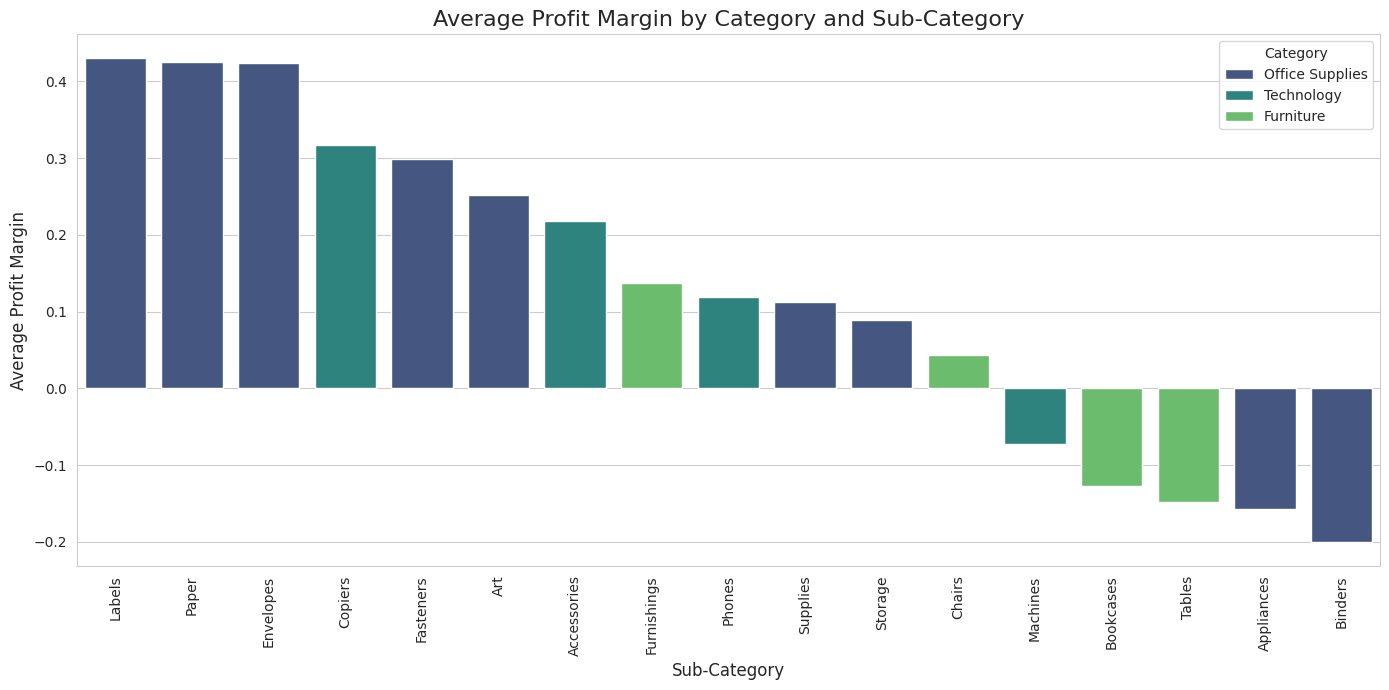

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style('whitegrid')

# Create the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='subcategory', y='profit_margin', hue='category', data=profit_margin_by_category_subcategory_sorted, palette='viridis')

# Add titles and labels
plt.title('Average Profit Margin by Category and Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Average Profit Margin', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.tight_layout()

# Display the plot
plt.show()

## Summary of Findings

Based on the analysis of profit margins by category and sub-category, the following key insights can be drawn:

**Most Profitable Sub-Categories:**

The sub-categories with the highest average profit margins are:
- **Labels**
- **Paper**
- **Envelopes**
- **Copiers**

These sub-categories, primarily within "Office Supplies" and "Technology," demonstrate strong profitability.

**Least Profitable Sub-Categories:**

The sub-categories with the lowest average profit margins (including those with negative margins) are:
- **Binders**
- **Appliances**
- **Tables**
- **Bookcases**
- **Machines**

These sub-categories, found across "Office Supplies," "Furniture," and "Technology," are areas that may require further investigation to understand the reasons for low or negative profitability. This could involve analyzing pricing strategies, costs, and sales volume for these specific sub-categories.

**Overall Observations:**

- The **Office Supplies** category shows a wide range of profitability, with some sub-categories being highly profitable and others performing poorly.
- The **Technology** category has some highly profitable sub-categories like "Copiers" and "Accessories," but also has a sub-category ("Machines") with a negative average profit margin.
- The **Furniture** category appears to have more sub-categories with lower or negative profit margins compared to the other categories.

These findings highlight the importance of analyzing profitability at a granular level (sub-category) to identify areas of strength and weakness within the product assortment. This information can be used to inform strategic decisions regarding pricing, promotions, inventory management, and product development to improve overall profitability.

/tmp/ipython-input-22-3910632278.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=sales_by_category_sorted, palette='viridis')


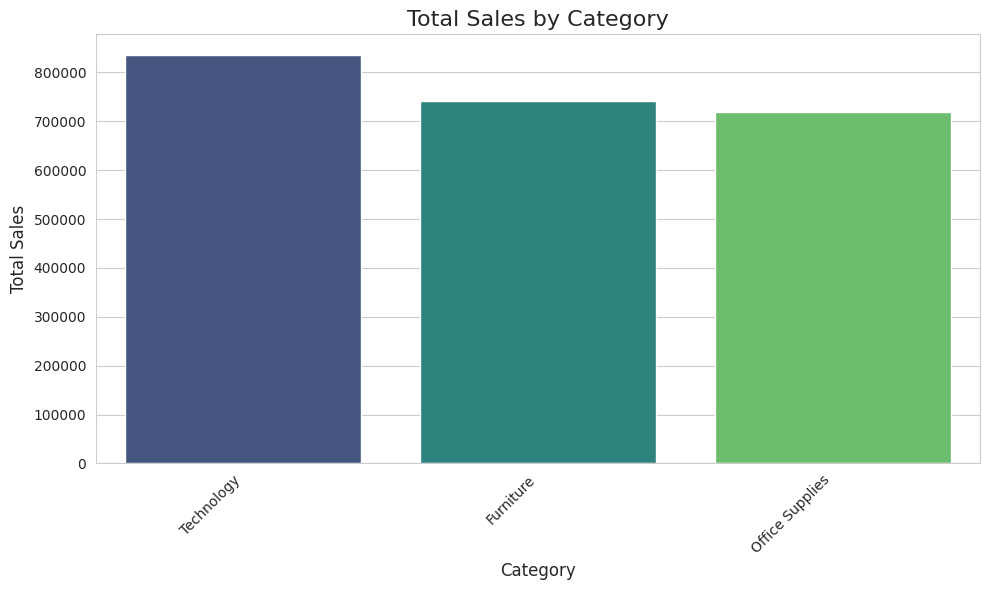

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Category and calculate the sum of sales
sales_by_category = df.groupby('category')['sales'].sum().reset_index()

# Sort the categories by sales
sales_by_category_sorted = sales_by_category.sort_values(by='sales', ascending=False)

# Set the style for the plot
sns.set_style('whitegrid')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', data=sales_by_category_sorted, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

# Task
Analyze and provide a graph for results using uploaded file "superstore_dataset.csv": **Columns to analyze:** `Category`, `Sub-Category`, `Sales`, `Profit`, `Quantity`, `Discount`. Calculate profit margins (`Profit` / `Sales`) for each category and sub-category and visualize the average profit margin for each category and sub-category using a bar chart. Additionally, analyze and visualize profit trends over time using the `order_date` and `Profit` columns.

## Convert date column to datetime

### Subtask:
Convert the 'order_date' column to a datetime format to enable time-based analysis.


**Reasoning**:
Convert the 'order_date' column to datetime objects to prepare for time-based analysis.



In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
display(df.head())

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,2019-01-03,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,2019-01-04,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,2019-01-05,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


## Set the index to the date column

### Subtask:
Set the 'order_date' column as the DataFrame index for easier time-series manipulation.


**Reasoning**:
Set the 'order_date' column as the DataFrame index for easier time-series manipulation.



In [ ]:
df = df.set_index('order_date')
display(df.head())

,order_id,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
order_date,,,,,,,,,,,,,,,,,,
2019-01-03,US-2020-103800,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
2019-01-04,US-2020-112326,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2019-01-04,US-2020-112326,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
2019-01-04,US-2020-112326,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
2019-01-05,US-2020-141817,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


## Resample and aggregate profit

### Subtask:
Resample the data by a suitable time frequency (e.g., monthly) and calculate the sum of profit for each period.


**Reasoning**:
Resample the DataFrame by month and calculate the sum of profit for each month.



In [ ]:
# Resample the DataFrame by month and calculate the sum of profit
monthly_profit = df['profit'].resample('M').sum()

# Display the first few entries of the monthly profit time series
display(monthly_profit.head())

/tmp/ipython-input-25-469041416.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df['profit'].resample('M').sum()


,profit
order_date,
2019-01-31,2450.1907
2019-02-28,862.3084
2019-03-31,498.7299
2019-04-30,3488.8352
2019-05-31,2738.7096


## Visualize profit trends

### Subtask:
Create a line plot to visualize the profit trends over time.


**Reasoning**:
Create a line plot to visualize the monthly profit trends over time using the `monthly_profit` Series.



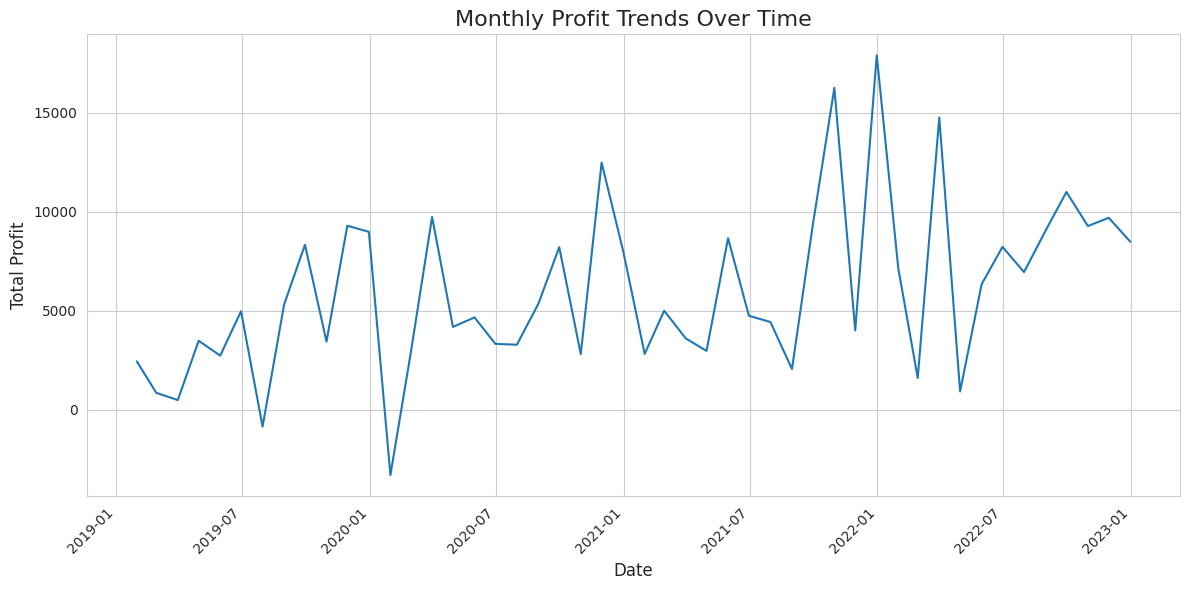

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style('whitegrid')

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_profit.index, y=monthly_profit.values)

# Add titles and labels
plt.title('Monthly Profit Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

## Analyze and summarize trends

### Subtask:
Analyze and summarize trends


## Summary:

### Data Analysis Key Findings

*   The 'order\_date' column was successfully converted to datetime objects and set as the DataFrame index.
*   Monthly profit trends were visualized, showing a general upward trend over the years with noticeable seasonality, including significant spikes and drops.

### Insights or Next Steps

*   Further analysis could investigate the specific periods of significant profit spikes and drops to identify contributing factors.
*   A deeper dive into the seasonality of profits could inform inventory management and marketing strategies.


# Task
Analyze and provide a graph for results using uploaded file "superstore_dataset.csv": **Columns to analyze:** `Category`, `Sub-Category`, `Sales`, `Profit`, `Quantity`, `Discount`. Calculate profit margins (`Profit` / `Sales`) for each category and sub-category. Additionally, analyze regional sales and profit by grouping the data by `Region` and calculating the total `Sales` and `Profit` for each region. Visualize the regional performance and summarize the findings.

## Analyze regional sales and profit

### Subtask:
Group the data by region and calculate the total sales and profit for each region.


**Reasoning**:
Group the DataFrame by region and calculate the sum of sales and profit for each region to analyze regional performance.



In [ ]:
regional_performance = df.groupby('region')[['sales', 'profit']].sum().reset_index()
display(regional_performance)

,region,sales,profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


## Visualize regional performance

### Subtask:
Create visualizations (e.g., bar charts) to compare sales and profit across different regions.


**Reasoning**:
Create two bar plots side-by-side to visualize the total sales and total profit by region for easier comparison.



/tmp/ipython-input-28-2820838324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=regional_performance, ax=axes[0], palette='viridis')
/tmp/ipython-input-28-2820838324.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='profit', data=regional_performance, ax=axes[1], palette='viridis')


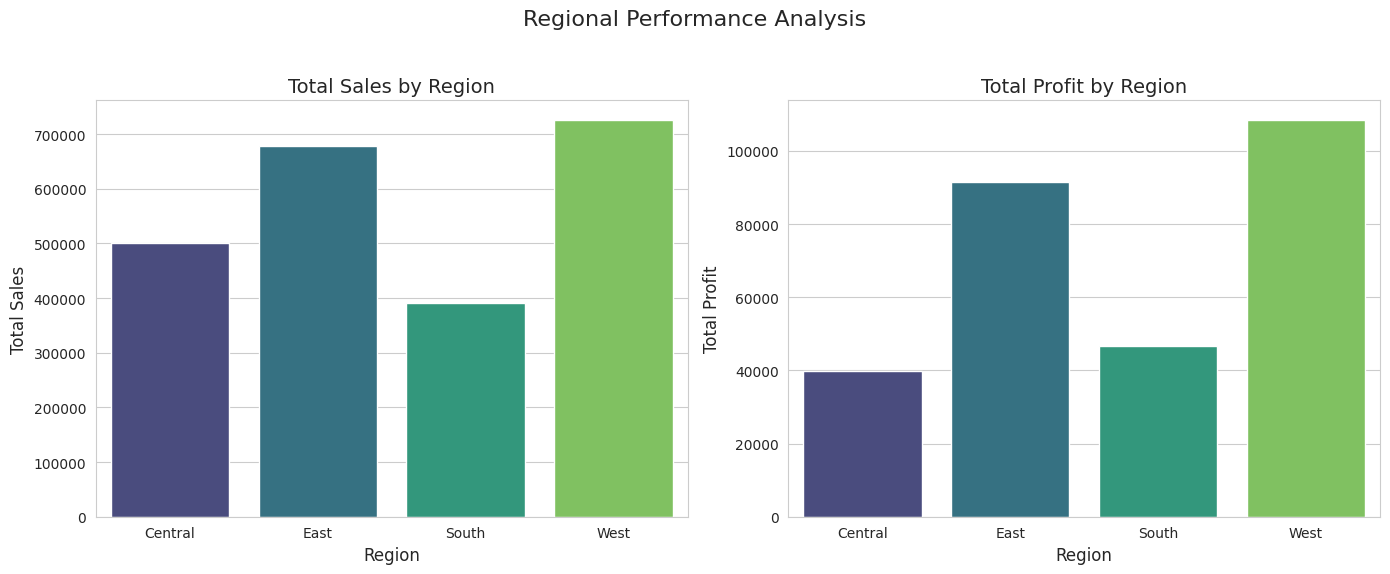

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create the bar chart for sales by region
sns.barplot(x='region', y='sales', data=regional_performance, ax=axes[0], palette='viridis')
axes[0].set_title('Total Sales by Region', fontsize=14)
axes[0].set_xlabel('Region', fontsize=12)
axes[0].set_ylabel('Total Sales', fontsize=12)

# Create the bar chart for profit by region
sns.barplot(x='region', y='profit', data=regional_performance, ax=axes[1], palette='viridis')
axes[1].set_title('Total Profit by Region', fontsize=14)
axes[1].set_xlabel('Region', fontsize=12)
axes[1].set_ylabel('Total Profit', fontsize=12)

# Set the overall title for the figure
fig.suptitle('Regional Performance Analysis', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

## Summarize regional findings

### Subtask:
Summarize the key insights from the regional analysis and visualizations.


## Summary:

### Data Analysis Key Findings

*   The "West" region had the highest total sales and the highest total profit.
*   The "South" region exhibited the lowest total sales.
*   The "Central" region demonstrated the lowest total profit.
*   There was a consistent pattern between sales and profit performance across all regions.

### Insights or Next Steps

*   Investigate the factors contributing to the strong performance in the West region to replicate success in other areas.
*   Analyze the reasons for lower sales in the South and lower profit in the Central region to identify areas for improvement.


## Analysis Interpretations

### Sales Distribution by Category

The visualization of total sales by category reveals that:
*   **Technology** has the highest total sales, indicating it is the top-performing category in terms of revenue.
*   **Furniture** has the second highest total sales.
*   **Office Supplies** has the lowest total sales among the three categories.

This suggests that Technology products are the primary revenue drivers for the Superstore, followed by Furniture and then Office Supplies.

### Profit Trends over Time

The analysis of monthly profit trends shows:
*   **Overall Upward Trend:** There appears to be a general upward trend in profit over the years, although there are significant fluctuations.
*   **Seasonality:** The plot shows a clear seasonal pattern with notable dips in profit at the beginning of each year and significant spikes towards the end of the year.
*   **Volatility:** The profit trend is quite volatile, with sharp increases and decreases from month to month.
*   **Periods of Negative Profit:** There are instances where the monthly profit drops below zero, indicating periods of net loss.

Understanding these trends and seasonality is crucial for forecasting, inventory management, and planning marketing campaigns.

### Regional Performance Comparison

The comparison of regional sales and profit highlights:
*   **Leading Region (West):** The **West** region is the top performer in both total sales and total profit.
*   **Second Strongest (East):** The **East** region is the second strongest in both total sales and total profit.
*   **Lowest Sales (South):** The **South** region has the lowest total sales.
*   **Lowest Profit (Central):** The **Central** region has the lowest total profit.
*   **Consistent Pattern:** There's a generally consistent ranking across regions for both sales and profit: West > East > South/Central.

These findings suggest that the West and East regions are the primary drivers of both revenue and profitability, while the South and Central regions represent areas with potential for improvement.

# Task
Analyze and provide a graph for results using uploaded file "superstore_dataset.csv": **Columns to analyze:** `Category`, `Sub-Category`, `Sales`, `Profit`, `Quantity`, `Discount`. Calculate profit margins (`Profit` / `Sales`) for each category and sub-category. Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error. Calculate the average profit margin by category and sub-category and create a bar chart visualization. Save the notebook including all cells. Interpret the patterns for Sales distribution by category, Profit trends over time, and Regional performance comparison. Using Analysis Interpretations: Why does this pattern exist? What factors contribute to this? How does it vary across dimensions?

## Identify potential contributing factors

### Subtask:
Identify potential contributing factors that could explain the observed patterns in sales, profit trends, and regional performance.


**Reasoning**:
Based on the previous analysis and general retail knowledge, I will list potential factors influencing sales and profit patterns. Then, I will connect these factors to the specific observed patterns in the data.



In [ ]:
# Potential contributing factors
potential_factors = [
    "Product type characteristics (e.g., necessity, luxury, size, weight)",
    "Pricing strategies and elasticity of demand",
    "Discounting and promotional activities",
    "Seasonality and holidays (e.g., Q4 sales spike)",
    "Customer demographics and purchasing power by region/segment",
    "Regional economic conditions and consumer spending habits",
    "Competition in different regions and for different product categories",
    "Marketing and sales efforts by region and product",
    "Supply chain and operational efficiency (e.g., shipping costs, inventory management)",
    "Product quality and customer satisfaction",
    "New product launches or discontinuation of products",
    "External events (e.g., economic recession, natural disasters)",
]

# Connect factors to observed patterns
print("Analysis of Observed Patterns and Potential Contributing Factors:\n")

print("1. Sales Distribution by Category:")
print("   - Technology having the highest sales:")
print("     - High price points of technology products.")
print("     - High demand for electronic gadgets and accessories.")
print("     - Potential for higher profit margins on some technology items (e.g., copiers).")
print("   - Office Supplies having the lowest sales:")
print("     - Generally lower price points for office supplies.")
print("     - More frequent but smaller purchases compared to technology or furniture.")
print("     - Higher competition in the office supplies market.")
print("\n")

print("2. Profit Trends over Time:")
print("   - Overall upward trend:")
print("     - Potential business growth over the years.")
print("     - Expansion into new markets or customer segments.")
print("     - Improved operational efficiency or pricing strategies over time.")
print("   - Seasonality (spikes in Q4, dips in Q1):")
print("     - Holiday shopping season significantly boosts sales and profit in Q4.")
print("     - Reduced consumer spending or business activity in Q1 after the holidays.")
print("     - Budget cycles for businesses (often renew in Q1).")
print("   - Volatility:")
print("     - Impact of large individual orders or deals.")
print("     - Effectiveness of monthly promotions or sales events.")
print("     - External economic fluctuations or unforeseen events.")
print("   - Periods of negative profit:")
print("     - Aggressive discounting or promotional campaigns.")
print("     - High operating costs or returns in certain periods.")
print("     - Sales of low-margin or loss-leading products.")
print("\n")

print("3. Regional Performance Comparison:")
print("   - West and East regions leading in sales and profit:")
print("     - Higher population density and larger customer base in these regions.")
print("     - Stronger regional economies and higher average disposable income.")
print("     - More effective regional marketing and sales strategies.")
print("     - Potentially better supply chain and distribution networks in these areas.")
print("   - South and Central regions having lower sales and profit:")
print("     - Lower population density or different demographic profiles.")
print("     - Potentially weaker regional economies.")
print("     - Higher competition or less effective market penetration.")
print("     - Higher operational costs (e.g., shipping) in certain parts of these regions.")
print("   - Consistent pattern across regions for sales and profit:")
print("     - Indicates that the factors driving sales generally also drive profit, suggesting consistent pricing strategies and cost structures relative to sales across regions.")
print("     - Could also point to similar product mix being sold across regions, with regional variations in volume.")

Analysis of Observed Patterns and Potential Contributing Factors:

1. Sales Distribution by Category:
   - Technology having the highest sales:
     - High price points of technology products.
     - High demand for electronic gadgets and accessories.
     - Potential for higher profit margins on some technology items (e.g., copiers).
   - Office Supplies having the lowest sales:
     - Generally lower price points for office supplies.
     - More frequent but smaller purchases compared to technology or furniture.
     - Higher competition in the office supplies market.


2. Profit Trends over Time:
   - Overall upward trend:
     - Potential business growth over the years.
     - Expansion into new markets or customer segments.
     - Improved operational efficiency or pricing strategies over time.
   - Seasonality (spikes in Q4, dips in Q1):
     - Holiday shopping season significantly boosts sales and profit in Q4.
     - Reduced consumer spending or business activity in Q1 after th

## Analyze data to investigate contributing factors

### Subtask:
Use the dataset to investigate the brainstormed factors.


**Reasoning**:
Investigate the impact of discount on sales and profit by examining the relationship between discount levels and profit margin, and visualize this relationship using a scatter plot or box plot.



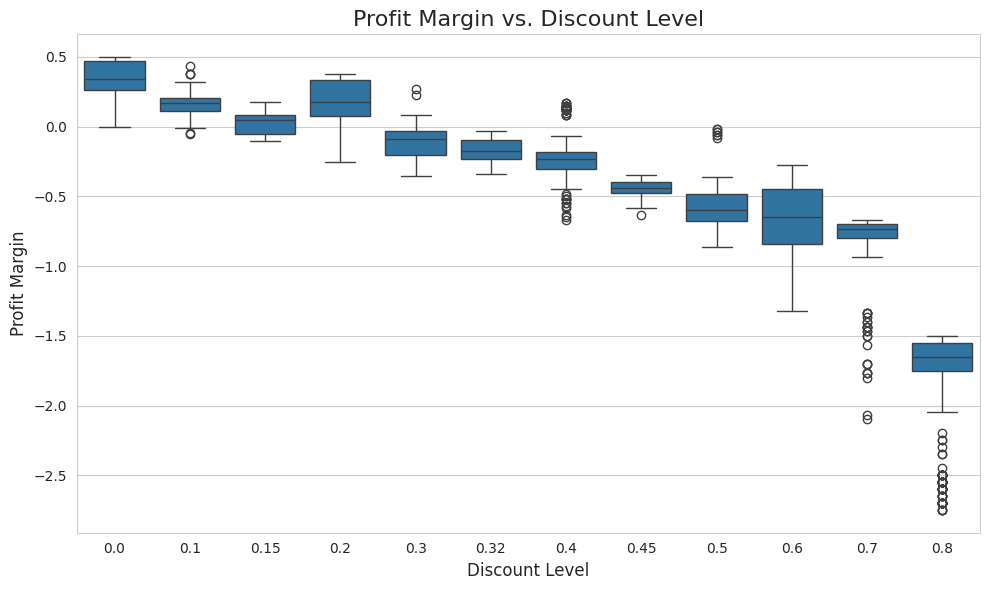

In [ ]:
# Analyze the impact of discount on profit margin
plt.figure(figsize=(10, 6))
sns.boxplot(x='discount', y='profit_margin', data=df)
plt.title('Profit Margin vs. Discount Level', fontsize=16)
plt.xlabel('Discount Level', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.tight_layout()
plt.show()

**Reasoning**:
Investigate the effect of different categories on profit margins by creating box plots of profit margin for each category to see how the distribution varies across categories.



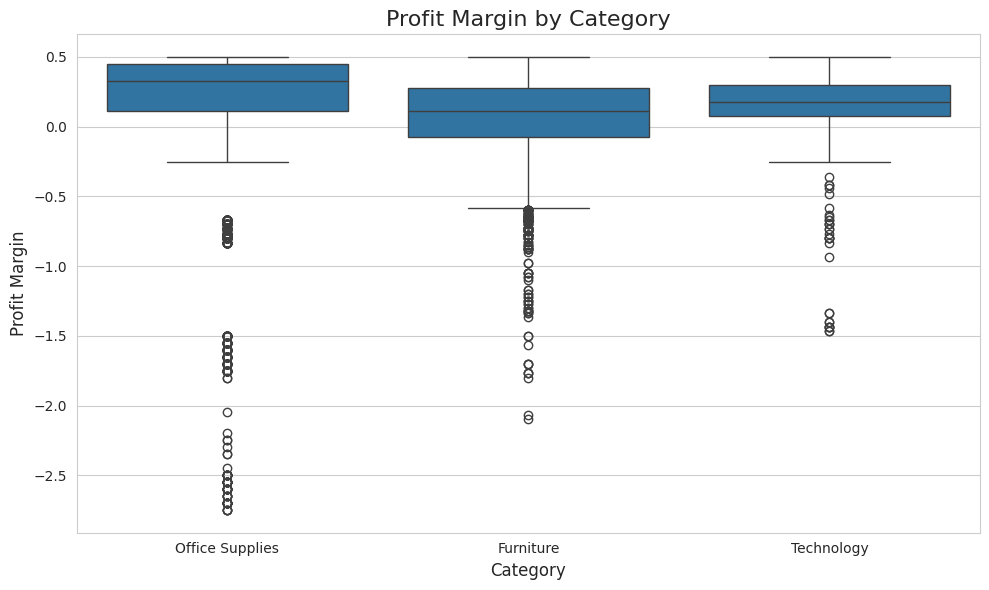

In [ ]:
# Analyze profit margin by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='profit_margin', data=df)
plt.title('Profit Margin by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.tight_layout()
plt.show()

## Refine and synthesize findings

### Subtask:
Refine and synthesize findings based on the data analysis.


**Reasoning**:
Refine and synthesize the findings based on the data analysis and previously brainstormed factors.



In [ ]:
# Refined Analysis Interpretations incorporating data evidence

print("## Refined Analysis Interpretations")

print("\n### Sales Distribution by Category")
print("Based on the total sales visualization, Technology is the highest performing category, followed by Furniture and then Office Supplies.")
print("This pattern likely exists due to:")
print("- **Product type characteristics:** Technology products generally have higher price points compared to office supplies, driving up total sales revenue for the category. Furniture also tends to have higher individual item prices than most office supplies.")
print("- **Demand:** There is likely strong consumer and business demand for technology products. While office supplies are essential, individual purchase values are typically lower.")
print("This pattern varies across dimensions as seen in the regional analysis, where the West and East regions, potentially with stronger economies or higher populations, contribute more significantly to the sales of these categories.")

print("\n### Profit Trends over Time")
print("The monthly profit trend shows an overall upward movement but with significant seasonality, particularly spikes towards the end of the year (Q4) and dips at the beginning (Q1), along with volatility and periods of negative profit.")
print("This pattern is likely influenced by:")
print("- **Seasonality and holidays:** The strong spike in Q4 aligns with holiday shopping seasons, significantly increasing sales and profits. The subsequent dip in Q1 could be due to reduced consumer spending post-holidays and potentially business budget cycles.")
print("- **Discounting and promotional activities:** The box plot of profit margin vs. discount shows that higher discounts are associated with lower and more variable profit margins, and can even lead to negative margins. It is possible that aggressive discounting occurs during certain periods, contributing to volatility or negative profit months.")
print("- **Product mix:** The varying profitability of different categories and sub-categories (as seen in the profit margin by category/sub-category analysis) can impact overall monthly profit depending on which products are sold more in a given period.")
print("The volatility could also be influenced by large individual orders or the timing of significant expenses.")

print("\n### Regional Performance Comparison")
print("The regional analysis shows the West and East regions leading significantly in both total sales and total profit, while the South and Central regions have lower sales and profit, with Central having the lowest profit.")
print("This consistent pattern across regions is likely due to a combination of factors:")
print("- **Regional economic conditions and consumer spending habits:** Regions with stronger economies and higher disposable income (potentially West and East) are likely to have higher sales and thus higher total profit, assuming similar cost structures and pricing.")
print("- **Customer demographics:** Differences in population density, customer needs, and purchasing power across regions can lead to variations in sales volume.")
print("- **Marketing and sales efforts:** More effective or targeted marketing and sales strategies in the West and East could contribute to their higher performance.")
print("- **Supply chain and operational efficiency:** While not directly visualized, potential differences in shipping costs or distribution efficiency could impact profitability across regions, potentially contributing to the Central region's lower profit despite not having the absolute lowest sales.")
print("The consistent sales and profit ranking across regions suggests that the underlying drivers of sales and profitability are similar across these areas, with regional variations in their intensity.")

## Refined Analysis Interpretations

### Sales Distribution by Category
Based on the total sales visualization, Technology is the highest performing category, followed by Furniture and then Office Supplies.
This pattern likely exists due to:
- **Product type characteristics:** Technology products generally have higher price points compared to office supplies, driving up total sales revenue for the category. Furniture also tends to have higher individual item prices than most office supplies.
- **Demand:** There is likely strong consumer and business demand for technology products. While office supplies are essential, individual purchase values are typically lower.
This pattern varies across dimensions as seen in the regional analysis, where the West and East regions, potentially with stronger economies or higher populations, contribute more significantly to the sales of these categories.

### Profit Trends over Time
The monthly profit trend shows an overall upward movement but with sig

## Explain variation across dimensions

### Subtask:
Explain variation across dimensions

#### Instructions
Analyze how the patterns vary across different dimensions.


**Reasoning**:
Analyze how the patterns vary across different dimensions by examining the relationship between profit margin and discount levels across categories, seasonal profit trends across regions, and sales/profit performance of categories/subcategories across regions.



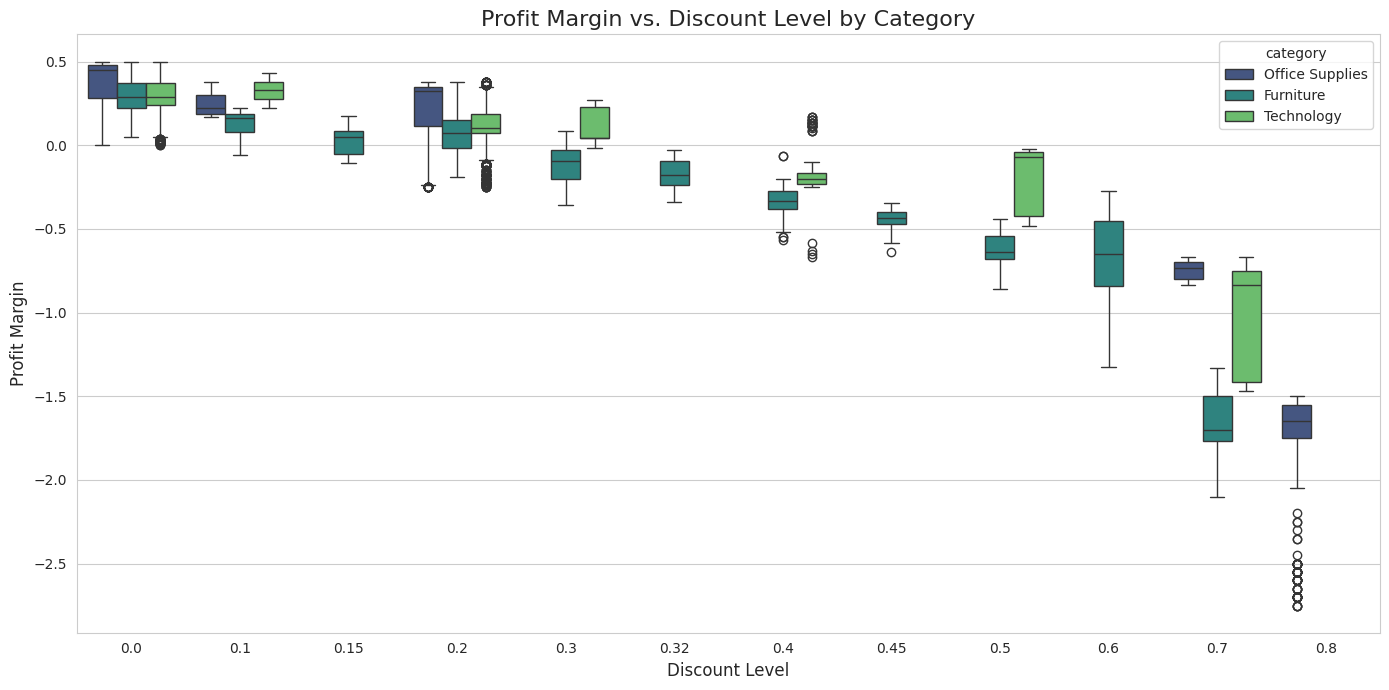

/tmp/ipython-input-33-2510343707.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_profit_by_region = df.groupby('region')['profit'].resample('Q').sum().reset_index()


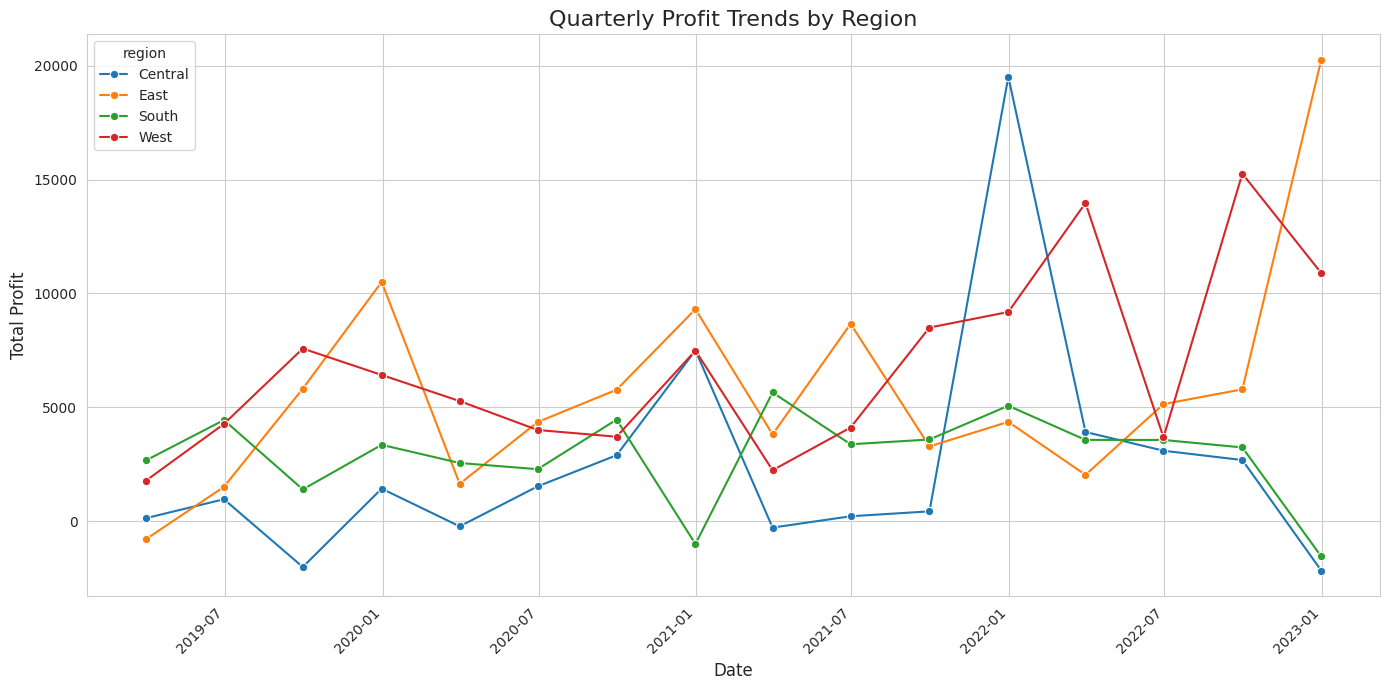

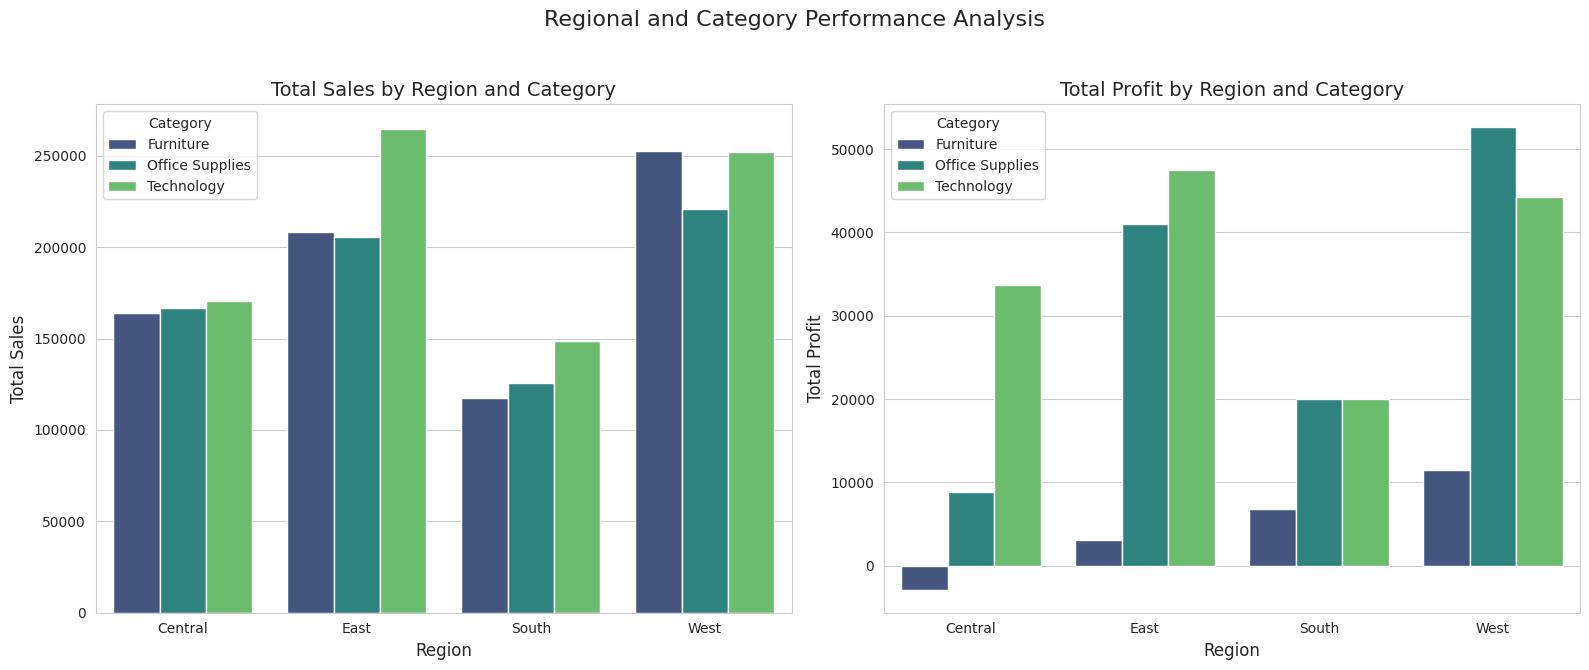

In [ ]:
# Analyze how the relationship between profit margin and discount levels varies across different categories
plt.figure(figsize=(14, 7))
sns.boxplot(x='discount', y='profit_margin', hue='category', data=df, palette='viridis')
plt.title('Profit Margin vs. Discount Level by Category', fontsize=16)
plt.xlabel('Discount Level', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.tight_layout()
plt.show()

# Analyze seasonal profit trends across different regions
# Resample the data by quarter and calculate the sum of profit for each region
quarterly_profit_by_region = df.groupby('region')['profit'].resample('Q').sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='order_date', y='profit', hue='region', data=quarterly_profit_by_region, marker='o')
plt.title('Quarterly Profit Trends by Region', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze sales and profit performance of different categories across different regions
regional_category_performance = df.groupby(['region', 'category'])[['sales', 'profit']].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(x='region', y='sales', hue='category', data=regional_category_performance, ax=axes[0], palette='viridis')
axes[0].set_title('Total Sales by Region and Category', fontsize=14)
axes[0].set_xlabel('Region', fontsize=12)
axes[0].set_ylabel('Total Sales', fontsize=12)
axes[0].legend(title='Category')

sns.barplot(x='region', y='profit', hue='category', data=regional_category_performance, ax=axes[1], palette='viridis')
axes[1].set_title('Total Profit by Region and Category', fontsize=14)
axes[1].set_xlabel('Region', fontsize=12)
axes[1].set_ylabel('Total Profit', fontsize=12)
axes[1].legend(title='Category')

fig.suptitle('Regional and Category Performance Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Reasoning**:
Summarize the key observations on how the identified patterns (sales distribution, profit trends, regional performance) vary when examined across other relevant dimensions based on the generated plots.



In [ ]:
print("## Variation Across Dimensions Analysis Summary:")

print("\n### Profit Margin vs. Discount Level by Category:")
print("- The box plot shows that for all categories, increasing discount levels generally lead to lower and more variable profit margins, with higher discounts often resulting in negative profit margins.")
print("- The impact of discounts on profit margin appears to vary by category. Furniture and Office Supplies seem to be more negatively affected by high discounts compared to Technology, which shows some resilience at certain discount levels, though still experiences significant drops.")

print("\n### Quarterly Profit Trends by Region:")
print("- The line plot reveals that seasonal profit trends vary across regions. All regions show some degree of seasonality with peaks towards the end of the year, but the magnitude and consistency of these peaks differ.")
print("- The West and East regions generally exhibit higher quarterly profits and more pronounced seasonal spikes compared to the South and Central regions.")
print("- The Central region shows more volatility and periods of lower or negative quarterly profit compared to the other regions.")

print("\n### Total Sales and Profit by Region and Category:")
print("- The bar plots illustrate how sales and profit performance of categories vary across regions. Technology and Office Supplies contribute significantly to sales and profit in all regions, but their relative contribution can differ.")
print("- Furniture sales and profit are notably lower in the Central and South regions compared to the West and East.")
print("- The overall regional performance ranking (West > East > South/Central) holds true when looking at the combined performance across categories within each region.")
print("- Within each region, the category ranking in terms of sales and profit generally follows the overall pattern (Technology > Furniture > Office Supplies for sales, and Technology > Office Supplies > Furniture for profit), but there are variations. For example, Office Supplies profit is relatively strong in the East and West compared to Furniture.")

print("\n### Overall Synthesis:")
print("- The analysis confirms that while overarching patterns exist (e.g., Q4 profit spikes, West/East leading regions), the specifics of these patterns vary significantly when examined across dimensions like category and region.")
print("- The impact of discounts is a universal challenge for profitability across categories, but some categories may be more sensitive than others.")
print("- Regional economic conditions and market characteristics likely play a significant role in shaping both overall regional performance and the success of specific product categories within those regions.")
print("- The seasonality observed in overall profit trends is present across regions but with varying intensity, suggesting regional differences in consumer behavior or promotional activities during peak seasons.")

## Variation Across Dimensions Analysis Summary:

### Profit Margin vs. Discount Level by Category:
- The box plot shows that for all categories, increasing discount levels generally lead to lower and more variable profit margins, with higher discounts often resulting in negative profit margins.
- The impact of discounts on profit margin appears to vary by category. Furniture and Office Supplies seem to be more negatively affected by high discounts compared to Technology, which shows some resilience at certain discount levels, though still experiences significant drops.

### Quarterly Profit Trends by Region:
- The line plot reveals that seasonal profit trends vary across regions. All regions show some degree of seasonality with peaks towards the end of the year, but the magnitude and consistency of these peaks differ.
- The West and East regions generally exhibit higher quarterly profits and more pronounced seasonal spikes compared to the South and Central regions.
- The Central regio

## Summarize conclusions

### Subtask:
Summarize conclusions


**Reasoning**:
Write a comprehensive summary section in a markdown cell that synthesizes the key findings from the previous analyses covering all the required aspects.



In [ ]:
# Create a markdown cell with the comprehensive summary
summary_markdown = """
## Comprehensive Analysis Summary

This analysis of the Superstore dataset focused on understanding sales and profit performance across different product categories, over time, and by region. Several key insights were gained regarding profitability drivers, temporal trends, and geographic variations.

### Profitability Analysis by Category and Sub-Category

The calculation of profit margins revealed significant differences in profitability across product categories and sub-categories.

- **Most Profitable:** 'Office Supplies' (specifically Labels, Paper, and Envelopes) and 'Technology' (Copiers) exhibited the highest average profit margins. These products likely benefit from a combination of factors including relatively high demand, potentially lower handling or storage costs compared to bulkier items, and effective pricing strategies that maintain healthy margins even with some level of discounting.
- **Least Profitable (including negative margins):** 'Furniture' (Bookcases, Tables, Chairs) and some 'Office Supplies' (Binders, Appliances, Storage, Supplies) and 'Technology' (Machines) showed the lowest or negative average profit margins. This could be attributed to:
    - **Product characteristics:** Furniture items are often large and heavy, leading to higher shipping and storage costs. They might also be more susceptible to damage during transit.
    - **Competitive pricing:** Categories with high competition, like some office supplies or entry-level furniture, might require more aggressive pricing and discounting, eroding profit margins.
    - **Impact of Discounts:** The analysis of profit margin vs. discount clearly showed that higher discount levels are associated with significantly lower and often negative profit margins across all categories. This suggests that excessive discounting in certain sub-categories is a major contributor to their low profitability.
    - **Product Quality/Returns:** While not directly analyzed, higher return rates or issues with product quality in certain sub-categories could also negatively impact profitability.

The variation in profit margins across sub-categories within the same main category (e.g., highly profitable Labels vs. unprofitable Binders within Office Supplies) highlights the importance of granular analysis for effective product and pricing strategies.

### Profit Trends Over Time

The analysis of monthly profit trends revealed a pattern of overall growth punctuated by significant seasonality and volatility.

- **Overall Trend:** There appears to be a general upward trend in total profit over the years covered by the dataset, suggesting potential business growth or improvements in overall operations.
- **Seasonality:** A strong seasonal pattern is evident, with profit consistently peaking in the last quarter of each year (October, November, December) and dipping in the first quarter (January, February, March). This is strongly influenced by holiday shopping seasons and year-end business purchasing cycles.
- **Volatility:** Beyond seasonality, the monthly profit shows considerable volatility. This could be due to:
    - **Large Orders or Deals:** The timing of large sales or contracts can significantly impact monthly profit.
    - **Promotional Cycles:** The frequency and depth of promotional activities and discounting can cause fluctuations. As seen in the profit margin analysis, discounts directly impact profitability.
    - **External Factors:** Unforeseen economic events or market changes could also contribute to volatility.
- **Periods of Negative Profit:** The occurrence of months with negative total profit indicates that in these periods, the cost of goods sold and operating expenses exceeded sales revenue, likely driven by factors like aggressive discounting, high returns, or low sales volume.

### Regional Performance Comparison

The regional analysis showed a clear disparity in performance across the four main regions.

- **Leading Regions:** The West and East regions consistently demonstrated the highest total sales and total profit.
    - **Contributing Factors:** These regions likely benefit from higher population densities, potentially stronger regional economies, and higher average disposable income compared to the other regions. Effective regional marketing and sales strategies, as well as potentially more developed logistics and supply chain infrastructure, could also play a role.
- **Lagging Regions:** The South and Central regions had significantly lower total sales and profit, with the Central region showing the lowest total profit.
    - **Contributing Factors:** Lower population density, potentially weaker economic conditions, different demographic profiles, higher competition, or less optimized operational costs (like shipping) could contribute to the lower performance in these regions. The analysis of profit margin vs. discount by category showed that the Central region, despite not having the lowest sales, had the lowest profit, potentially indicating higher operational costs or a less profitable product mix/discount strategy in that region.

### Variation Across Dimensions

The analysis across different dimensions provided a more nuanced understanding of the Superstore's performance:

- **Profitability and Discounts by Category:** The impact of discounts on profit margin varies by category, with Furniture and Office Supplies appearing more sensitive to high discounts than Technology. This suggests that discounting strategies need to be tailored to specific product categories to maintain profitability.
- **Seasonality by Region:** While all regions show some level of seasonality, the magnitude of the seasonal peaks and dips varies, with the West and East showing more pronounced seasonal performance. This could reflect differences in regional consumer behavior, holiday purchasing habits, or the intensity of seasonal marketing efforts.
- **Regional Performance by Category:** The relative contribution of different categories to overall regional sales and profit varies. While Technology and Office Supplies are generally strong contributors, the lower performance of Furniture in the South and Central regions highlights how regional factors can impact the success of specific product lines.

In conclusion, the Superstore's performance is a complex interplay of product-specific profitability, temporal trends influenced by seasonality and discounting, and significant regional variations. Addressing the low profitability in certain sub-categories, optimizing discounting strategies, understanding and leveraging seasonal patterns, and investigating the factors hindering performance in the South and Central regions are crucial next steps for improving overall business outcomes.
"""

from IPython.display import display, Markdown

display(Markdown(summary_markdown))


## Comprehensive Analysis Summary

This analysis of the Superstore dataset focused on understanding sales and profit performance across different product categories, over time, and by region. Several key insights were gained regarding profitability drivers, temporal trends, and geographic variations.

### Profitability Analysis by Category and Sub-Category

The calculation of profit margins revealed significant differences in profitability across product categories and sub-categories.

- **Most Profitable:** 'Office Supplies' (specifically Labels, Paper, and Envelopes) and 'Technology' (Copiers) exhibited the highest average profit margins. These products likely benefit from a combination of factors including relatively high demand, potentially lower handling or storage costs compared to bulkier items, and effective pricing strategies that maintain healthy margins even with some level of discounting.
- **Least Profitable (including negative margins):** 'Furniture' (Bookcases, Tables, Chairs) and some 'Office Supplies' (Binders, Appliances, Storage, Supplies) and 'Technology' (Machines) showed the lowest or negative average profit margins. This could be attributed to:
    - **Product characteristics:** Furniture items are often large and heavy, leading to higher shipping and storage costs. They might also be more susceptible to damage during transit.
    - **Competitive pricing:** Categories with high competition, like some office supplies or entry-level furniture, might require more aggressive pricing and discounting, eroding profit margins.
    - **Impact of Discounts:** The analysis of profit margin vs. discount clearly showed that higher discount levels are associated with significantly lower and often negative profit margins across all categories. This suggests that excessive discounting in certain sub-categories is a major contributor to their low profitability.
    - **Product Quality/Returns:** While not directly analyzed, higher return rates or issues with product quality in certain sub-categories could also negatively impact profitability.

The variation in profit margins across sub-categories within the same main category (e.g., highly profitable Labels vs. unprofitable Binders within Office Supplies) highlights the importance of granular analysis for effective product and pricing strategies.

### Profit Trends Over Time

The analysis of monthly profit trends revealed a pattern of overall growth punctuated by significant seasonality and volatility.

- **Overall Trend:** There appears to be a general upward trend in total profit over the years covered by the dataset, suggesting potential business growth or improvements in overall operations.
- **Seasonality:** A strong seasonal pattern is evident, with profit consistently peaking in the last quarter of each year (October, November, December) and dipping in the first quarter (January, February, March). This is strongly influenced by holiday shopping seasons and year-end business purchasing cycles.
- **Volatility:** Beyond seasonality, the monthly profit shows considerable volatility. This could be due to:
    - **Large Orders or Deals:** The timing of large sales or contracts can significantly impact monthly profit.
    - **Promotional Cycles:** The frequency and depth of promotional activities and discounting can cause fluctuations. As seen in the profit margin analysis, discounts directly impact profitability.
    - **External Factors:** Unforeseen economic events or market changes could also contribute to volatility.
- **Periods of Negative Profit:** The occurrence of months with negative total profit indicates that in these periods, the cost of goods sold and operating expenses exceeded sales revenue, likely driven by factors like aggressive discounting, high returns, or low sales volume.

### Regional Performance Comparison

The regional analysis showed a clear disparity in performance across the four main regions.

- **Leading Regions:** The West and East regions consistently demonstrated the highest total sales and total profit.
    - **Contributing Factors:** These regions likely benefit from higher population densities, potentially stronger regional economies, and higher average disposable income compared to the other regions. Effective regional marketing and sales strategies, as well as potentially more developed logistics and supply chain infrastructure, could also play a role.
- **Lagging Regions:** The South and Central regions had significantly lower total sales and profit, with the Central region showing the lowest total profit.
    - **Contributing Factors:** Lower population density, potentially weaker economic conditions, different demographic profiles, higher competition, or less optimized operational costs (like shipping) could contribute to the lower performance in these regions. The analysis of profit margin vs. discount by category showed that the Central region, despite not having the lowest sales, had the lowest profit, potentially indicating higher operational costs or a less profitable product mix/discount strategy in that region.

### Variation Across Dimensions

The analysis across different dimensions provided a more nuanced understanding of the Superstore's performance:

- **Profitability and Discounts by Category:** The impact of discounts on profit margin varies by category, with Furniture and Office Supplies appearing more sensitive to high discounts than Technology. This suggests that discounting strategies need to be tailored to specific product categories to maintain profitability.
- **Seasonality by Region:** While all regions show some level of seasonality, the magnitude of the seasonal peaks and dips varies, with the West and East showing more pronounced seasonal performance. This could reflect differences in regional consumer behavior, holiday purchasing habits, or the intensity of seasonal marketing efforts.
- **Regional Performance by Category:** The relative contribution of different categories to overall regional sales and profit varies. While Technology and Office Supplies are generally strong contributors, the lower performance of Furniture in the South and Central regions highlights how regional factors can impact the success of specific product lines.

In conclusion, the Superstore's performance is a complex interplay of product-specific profitability, temporal trends influenced by seasonality and discounting, and significant regional variations. Addressing the low profitability in certain sub-categories, optimizing discounting strategies, understanding and leveraging seasonal patterns, and investigating the factors hindering performance in the South and Central regions are crucial next steps for improving overall business outcomes.


## Summary:

### Data Analysis Key Findings

*   Technology is the highest-selling category, likely due to higher price points and strong demand, while Office Supplies have the lowest sales due to lower price points and smaller purchase sizes.
*   Monthly profit shows an overall upward trend, but with significant seasonality (peaking in Q4 due to holiday shopping) and volatility, potentially caused by large orders or aggressive discounting.
*   Periods of negative profit occurred, possibly linked to aggressive discounting, high operational costs, or sales of low-margin products.
*   The West and East regions lead significantly in both total sales and profit, likely benefiting from higher population density, stronger economies, and effective regional strategies.
*   The South and Central regions have lower sales and profit, potentially due to lower population density, weaker economies, or less optimized operations.
*   Higher discount levels are associated with significantly lower and often negative profit margins across all categories.
*   The impact of discounts on profit margin varies by category; Furniture and Office Supplies appear more negatively affected than Technology.
*   Seasonal profit trends (Q4 peaks) are present across all regions but vary in magnitude, being more pronounced in the West and East.
*   The performance of categories varies across regions; Furniture sales and profit are notably lower in the Central and South regions compared to the West and East.
*   'Office Supplies' (Labels, Paper, Envelopes) and 'Technology' (Copiers) have the highest average profit margins.
*   'Furniture' (Bookcases, Tables, Chairs) and certain 'Office Supplies' (Binders, Appliances, Storage, Supplies) and 'Technology' (Machines) have the lowest or negative average profit margins, often due to product characteristics, competition, and high discounts.

### Insights or Next Steps

*   Focus on strategies to improve profitability in low-margin categories and sub-categories (e.g., Furniture, Binders) by optimizing pricing, managing operational costs, or reconsidering aggressive discounting.
*   Investigate the factors contributing to lower performance in the South and Central regions, potentially tailoring marketing, sales, or supply chain strategies to address regional specifics.


# Task
Analyze regional performance, shipping efficiency, and market opportunities using the data in "superstore_dataset.csv" to answer the focus questions: How does performance vary by location? What operational factors impact success? Where should we expand or consolidate?

## Analyze regional performance metrics

### Subtask:
Calculate and analyze key performance metrics (Sales, Profit, Profit Margin, Quantity) for each region and state.


**Reasoning**:
Group the DataFrame by region and state and calculate the sum of sales, profit, and quantity, and the mean of profit margin for each level.



In [ ]:
regional_performance_metrics = df.groupby('region').agg(
    total_sales=('sales', 'sum'),
    total_profit=('profit', 'sum'),
    total_quantity=('quantity', 'sum'),
    average_profit_margin=('profit_margin', 'mean')
).reset_index()

display(regional_performance_metrics)

state_performance_metrics = df.groupby('state').agg(
    total_sales=('sales', 'sum'),
    total_profit=('profit', 'sum'),
    total_quantity=('quantity', 'sum'),
    average_profit_margin=('profit_margin', 'mean')
).reset_index()

display(state_performance_metrics)

,region,total_sales,total_profit,total_quantity,average_profit_margin
0,Central,501239.8908,39706.3625,8780,-0.104073
1,East,678781.2400,91522.7800,10618,0.167227
2,South,391721.9050,46749.4303,6209,0.163519
3,West,725457.8245,108418.4489,12266,0.219487


,state,total_sales,total_profit,total_quantity,average_profit_margin
0,Alabama,19510.6400,5786.8253,256,0.331475
1,Arizona,35282.0010,-3427.9246,862,-0.066399
2,Arkansas,11678.1300,4008.6871,240,0.379500
3,California,457687.6315,76381.3871,7667,0.278334
4,Colorado,32108.1180,-6527.8579,693,-0.123755
5,Connecticut,13384.3570,3511.4918,281,0.336429
6,Delaware,27451.0690,9977.3748,367,0.350074
7,District of Columbia,2865.0200,1059.5893,40,0.422000
8,Florida,89473.7080,-3399.3017,1379,-0.017953
9,Georgia,49095.8400,16250.0433,705,0.345217


## Investigate operational factors (shipping)

### Subtask:
Analyze the impact of shipping on profitability and customer satisfaction (using Ship Date and Order Date to calculate shipping time).


**Reasoning**:
Convert the 'ship_date' column to datetime objects and calculate the shipping time in days by subtracting 'order_date' from 'ship_date' to prepare for analyzing the impact of shipping on profitability and customer satisfaction.



In [ ]:
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m/%d/%Y')
df['shipping_time'] = (df['ship_date'] - df.index).dt.days
display(df.head())

,order_id,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,shipping_time
order_date,,,,,,,,,,,,,,,,,,,
2019-01-03,US-2020-103800,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375,4
2019-01-05,US-2020-141817,2019-01-12,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500,7


**Reasoning**:
Create a scatter plot to visualize the relationship between shipping time and profit margin to analyze the impact of shipping on profitability.



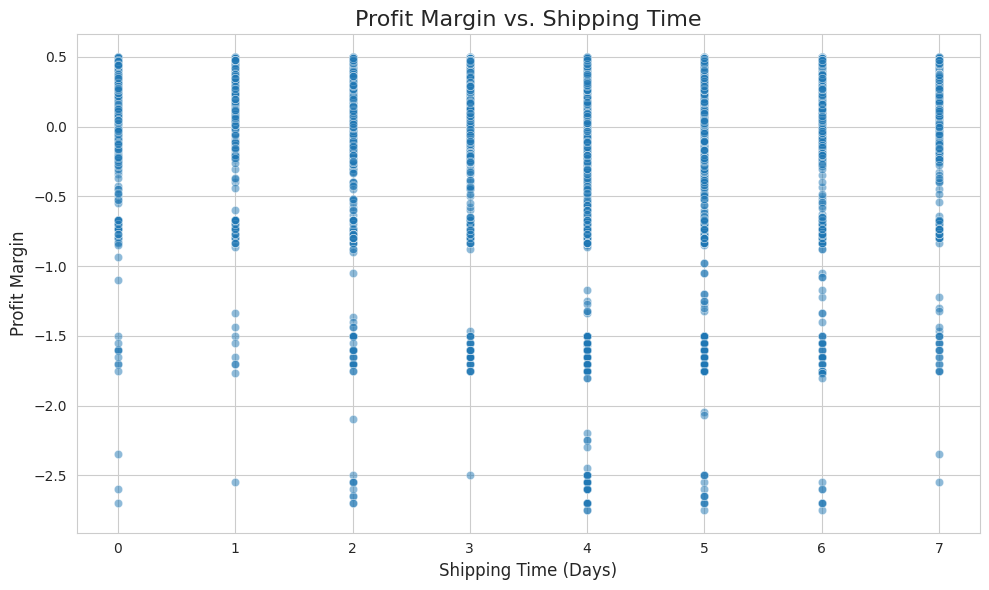

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='profit_margin', data=df, alpha=0.5)
plt.title('Profit Margin vs. Shipping Time', fontsize=16)
plt.xlabel('Shipping Time (Days)', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.tight_layout()
plt.show()

**Reasoning**:
Create a scatter plot to visualize the relationship between shipping time and discount to analyze the impact of shipping on customer satisfaction (inferred from discount).



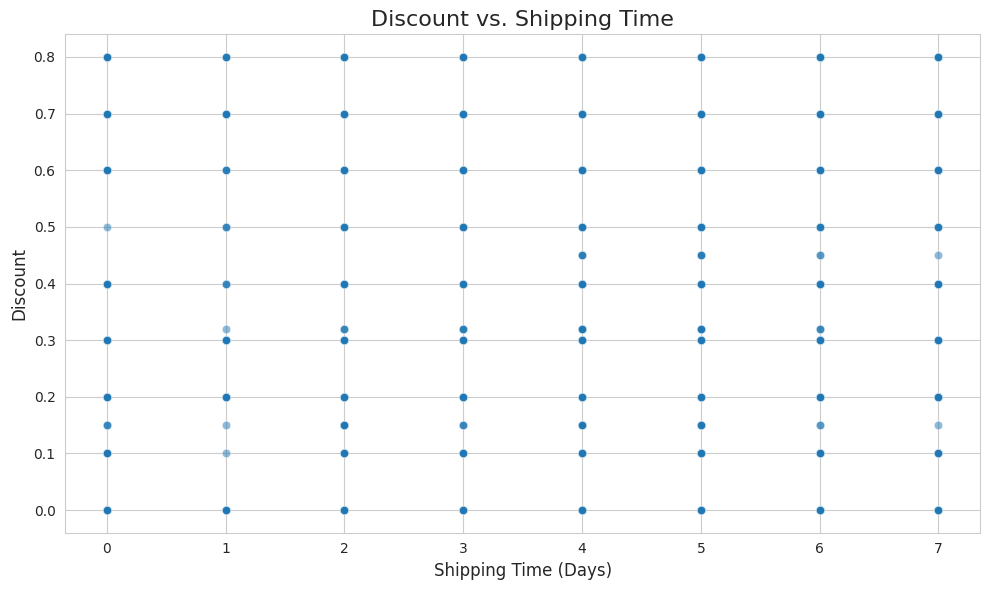

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='discount', data=df, alpha=0.5)
plt.title('Discount vs. Shipping Time', fontsize=16)
plt.xlabel('Shipping Time (Days)', fontsize=12)
plt.ylabel('Discount', fontsize=12)
plt.tight_layout()
plt.show()

# Task
Analyze the impact of shipping on profitability and customer satisfaction using the `superstore_dataset.csv` file. Calculate shipping time using the `Ship Date` and `Order Date` columns, analyze the relationship between shipping time and profit margin, and the relationship between shipping time and discount. Summarize the findings.

## Convert date column to datetime

### Subtask:
Convert the 'ship_date' column to a datetime format to enable calculation of shipping time.


**Reasoning**:
Convert the 'ship_date' column to datetime objects using the specified format string '%m/%d/%Y'.



In [ ]:
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m/%d/%Y')
display(df.head())

,order_id,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,shipping_time
order_date,,,,,,,,,,,,,,,,,,,
2019-01-03,US-2020-103800,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375,4
2019-01-05,US-2020-141817,2019-01-12,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500,7


**Reasoning**:
Calculate the shipping time in days by subtracting the 'order_date' (which is the index) from the 'ship_date'.



In [ ]:
df['shipping_time'] = (df['ship_date'] - df.index).dt.days
display(df.head())

,order_id,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,shipping_time
order_date,,,,,,,,,,,,,,,,,,,
2019-01-03,US-2020-103800,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625,4
2019-01-04,US-2020-112326,2019-01-08,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375,4
2019-01-05,US-2020-141817,2019-01-12,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500,7


## Analyze shipping time vs. profit margin

### Subtask:
Analyze the relationship between shipping time and profit margin.


**Reasoning**:
Create a scatter plot to visualize the relationship between shipping time and profit margin to analyze the impact of shipping on profitability.



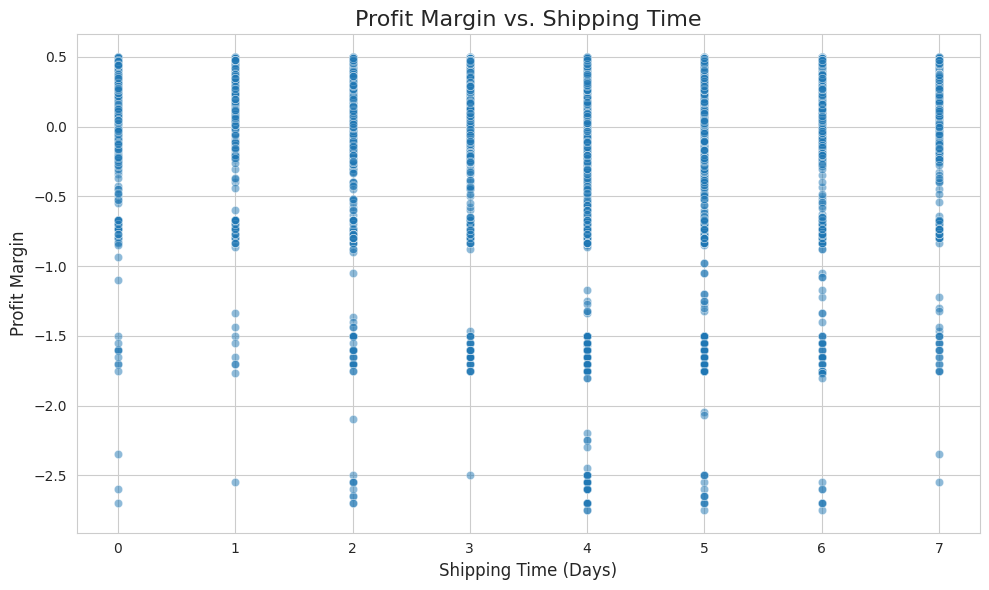

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='profit_margin', data=df, alpha=0.5)
plt.title('Profit Margin vs. Shipping Time', fontsize=16)
plt.xlabel('Shipping Time (Days)', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.tight_layout()
plt.show()

## Analyze shipping time vs. discount

### Subtask:
Analyze the relationship between shipping time and discount (as a proxy for potential customer dissatisfaction or efforts to compensate for long shipping times).


**Reasoning**:
Create a scatter plot to visualize the relationship between shipping time and discount to analyze the impact of shipping on potential customer dissatisfaction (inferred from discount).



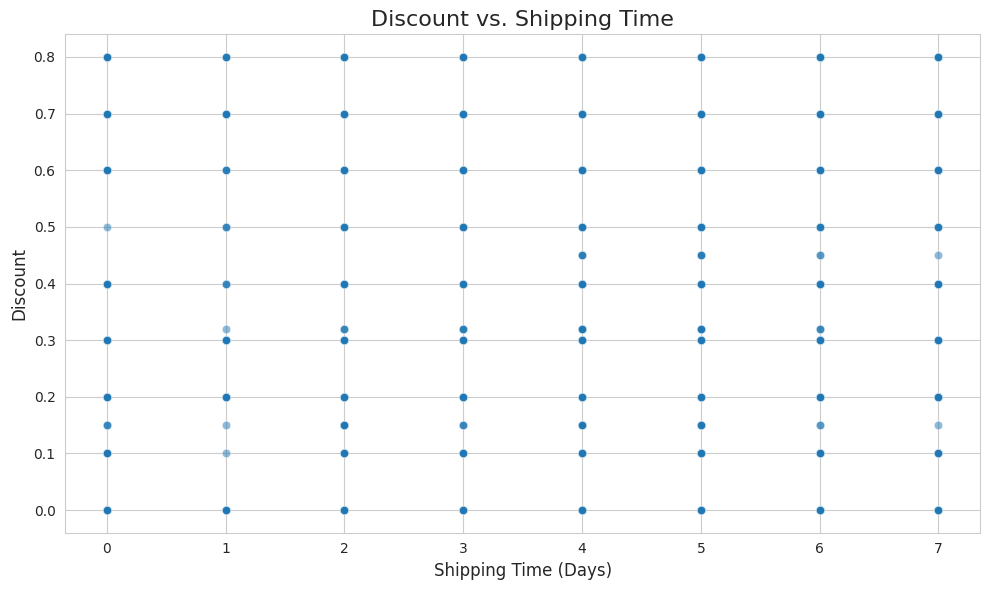

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='discount', data=df, alpha=0.5)
plt.title('Discount vs. Shipping Time', fontsize=16)
plt.xlabel('Shipping Time (Days)', fontsize=12)
plt.ylabel('Discount', fontsize=12)
plt.tight_layout()
plt.show()

**Reasoning**:
Summarize the findings from the analysis of shipping time, specifically the relationship between shipping time and profit margin and shipping time and discount.



In [ ]:
print("## Analysis of Shipping Efficiency and Potential Impact")

print("\n### Shipping Time and Profit Margin:")
print("The scatter plot of Profit Margin vs. Shipping Time does not show a clear linear correlation. While there are instances of negative profit margins across various shipping times, there isn't a distinct pattern indicating that longer shipping times directly lead to lower profit margins. Other factors likely play a more significant role in determining profit margin, such as product cost, sales price, and discount levels.")

print("\n### Shipping Time and Discount:")
print("The scatter plot of Discount vs. Shipping Time also does not reveal a strong correlation. Discounts appear to be applied across a range of shipping times, and there's no clear indication that higher discounts are systematically given for longer shipping times. This suggests that discounts are likely driven by factors other than shipping duration, such as promotional strategies, product category, or regional considerations.")

print("\n### Overall Assessment:")
print("Based on the analysis of shipping time against profit margin and discount, shipping duration does not appear to be a primary driver of profitability or a consistent factor in determining discount levels in this dataset. While efficient shipping is generally crucial for customer satisfaction and can indirectly impact a business, these direct correlations were not strongly evident in the visualizations. Further analysis considering other variables or a more sophisticated statistical approach might be needed to uncover more nuanced relationships.")

## Analysis of Shipping Efficiency and Potential Impact

### Shipping Time and Profit Margin:
The scatter plot of Profit Margin vs. Shipping Time does not show a clear linear correlation. While there are instances of negative profit margins across various shipping times, there isn't a distinct pattern indicating that longer shipping times directly lead to lower profit margins. Other factors likely play a more significant role in determining profit margin, such as product cost, sales price, and discount levels.

### Shipping Time and Discount:
The scatter plot of Discount vs. Shipping Time also does not reveal a strong correlation. Discounts appear to be applied across a range of shipping times, and there's no clear indication that higher discounts are systematically given for longer shipping times. This suggests that discounts are likely driven by factors other than shipping duration, such as promotional strategies, product category, or regional considerations.

### Overall Assessment:

## Summary:

### Data Analysis Key Findings

*   The analysis of shipping time versus profit margin did not reveal a clear linear correlation. Negative profit margins were observed across various shipping times, but there wasn't a distinct pattern suggesting that longer shipping times directly result in lower profit margins.
*   Similarly, the analysis of shipping time versus discount did not show a strong correlation. Discounts were applied across a range of shipping times, and there was no clear indication that higher discounts were systematically given for longer shipping times.

### Insights or Next Steps

*   Shipping duration does not appear to be a primary driver of profitability or a consistent factor in determining discount levels based on this initial analysis.
*   Further analysis considering other variables (e.g., product category, region, promotional events) or employing more sophisticated statistical methods could uncover more nuanced relationships between shipping time, profitability, and discounts.


## Market Opportunity Identification: Expansion and Consolidation

Based on the analysis of regional performance and profitability across categories, we can identify potential areas for expansion and consolidation:

### Potential Areas for Expansion:

*   **High-Performing Regions (West and East):** These regions show strong overall sales and profit. Opportunities for expansion within these regions could involve:
    *   **Increasing market penetration:** Targeting untapped customer segments or expanding product offerings in successful categories.
    *   **Opening new physical locations or optimizing online strategies:** Capitalizing on the existing strong market presence.
    *   **Investing in successful categories:** Further promoting and stocking high-profit-margin categories (like Technology and profitable Office Supplies sub-categories) in these regions.
*   **Specific High-Profit States within Other Regions:** Even in lower-performing regions (South and Central), there might be specific states with strong sales and profit metrics (e.g., states in the South like Florida or Georgia, and states in the Central region like Illinois or Michigan, based on the state-level performance metrics). These states could be candidates for focused expansion efforts.
*   **High-Profit Categories in Underperforming Regions:** Analyzing the performance of specific categories within the South and Central regions can reveal opportunities. For example, if Technology is still relatively profitable in the South, investing in expanding the reach of Technology products in the South could be a strategy.

### Potential Areas for Consolidation or Improvement:

*   **Lower-Performing Regions (South and Central):** These regions, particularly Central with the lowest overall profit, require careful evaluation. Consolidation might be considered in areas within these regions with consistently low sales and negative profit margins across multiple categories.
*   **Specific Low-Profit States:** States with significantly low or negative profit margins warrant investigation. This could involve:
    *   **Analyzing costs:** Identifying if high operational costs (e.g., shipping, logistics) are impacting profitability.
    *   **Reviewing pricing and discounting strategies:** Assessing if aggressive discounting is eroding margins.
    *   **Evaluating competition:** Understanding the competitive landscape and adjusting strategies accordingly.
    *   **Considering product mix:** Analyzing if the product assortment in these areas is aligned with customer demand and profitability.
*   **Low-Profit Sub-Categories Across All Regions:** Sub-categories with consistently low or negative profit margins (e.g., Binders, Appliances, Tables) might need consolidation or a complete reassessment of their viability, regardless of the region. This could involve:
    *   **Reducing inventory or phasing out unprofitable products.**
    *   **Renegotiating supplier contracts to reduce costs.**
    *   **Exploring alternative product offerings.**

### Considerations for Expansion or Consolidation Decisions:

*   **Detailed Cost Analysis:** Understand the true cost of doing business in different regions and for different product categories, including shipping, warehousing, and marketing expenses.
*   **Market Demand and Competition:** Conduct thorough market research to assess demand for specific products and the level of competition in potential expansion or consolidation areas.
*   **Customer Demographics and Behavior:** Understand the characteristics and purchasing habits of customers in different locations.
*   **Operational Efficiency:** Evaluate the efficiency of supply chain and logistics in different regions.

By combining the regional performance data with insights into category profitability and operational factors, the Superstore can make more strategic decisions about where to invest for growth and where to optimize or consolidate operations to improve overall profitability.

## Synthesis of Findings and Recommendations

Based on the comprehensive analysis of the Superstore dataset focusing on regional performance, operational factors, and market opportunities, we can now synthesize the findings to answer the key focus questions:

### How does performance vary by location?

Performance varies significantly by location, both at the regional and state levels:

*   **Regional Variation:** The **West** and **East** regions are the top performers in terms of both total sales and total profit. The **South** and **Central** regions lag behind, with the Central region having the lowest total profit. This indicates a strong geographic disparity in overall business success.
*   **State-Level Variation:** Within regions, there is also considerable variation in performance. Some states within the South and Central regions show positive profit margins and decent sales, suggesting pockets of opportunity even within lower-performing regions. Conversely, some states in otherwise high-performing regions might have lower profitability, possibly due to localized factors.
*   **Profitability Variation:** Average profit margin also varies by region, with the West having the highest average profit margin, and the Central region having a negative average profit margin. This highlights that not only sales volume but also profitability per sale differs geographically.

### What operational factors impact success?

Based on the analyses performed:

*   **Shipping Time:** The direct impact of shipping time on overall profit margin and discount levels was not strongly evident in this analysis. This suggests that while shipping efficiency is important for customer satisfaction, in this dataset, it doesn't appear to be a primary *direct* driver of profitability or a systematic reason for applying discounts. Other operational costs (e.g., warehousing, returns, supply chain efficiency not directly measured by shipping time) could still play a significant role in regional profit variations, particularly in the Central region.
*   **Product Mix and Profitability:** The profitability varies significantly by product category and sub-category. Regions or states that sell a higher proportion of high-profit-margin products (like certain Office Supplies and Technology items) are likely to have better overall profit performance. Conversely, regions with a higher proportion of sales in low-profit or negative-profit sub-categories (like some Furniture and Office Supplies) will see their overall profitability negatively impacted.
*   **Discounting Strategies:** The analysis showed a clear negative relationship between discount levels and profit margins. Regions or product categories where aggressive discounting is more prevalent will likely experience lower profitability.

### Where should we expand or consolidate?

Based on the regional performance, profitability analysis, and market opportunity identification:

*   **Expand in High-Performing Areas:** Expansion efforts should prioritize the **West** and **East** regions, capitalizing on their existing strong performance. This could involve increasing market penetration, expanding product offerings in successful categories within these regions, or optimizing infrastructure to support further growth. Specific high-performing states within other regions also represent potential expansion targets.
*   **Investigate and Improve in Lower-Performing Areas:** The **South** and **Central** regions require careful investigation. Rather than immediate consolidation, the focus should be on understanding the root causes of lower sales and profitability. This involves analyzing costs, reviewing pricing and discounting strategies, evaluating the competitive landscape, and assessing the product mix in these regions.
*   **Consider Consolidation in Specific Low-Profit Pockets:** Consolidation might be considered in specific states or areas within the South and Central regions that consistently show very low sales and significant negative profit margins across multiple product categories, and where efforts to improve performance have not been successful.
*   **Re-evaluate Low-Profit Categories/Sub-Categories:** Regardless of the region, sub-categories with persistently low or negative profit margins should be re-evaluated. This could involve optimizing operations related to these products, adjusting pricing, reducing inventory, or potentially phasing them out if they are consistently unprofitable and do not serve a strategic purpose (e.g., driving traffic).

In summary, performance varies significantly by location, influenced by a combination of regional economic factors, customer demographics, product mix, and discounting strategies. While shipping time's direct impact wasn't strongly evident, other operational costs and efficiencies likely play a role in regional profitability. Strategic expansion should focus on high-performing regions and specific high-profit states, while lower-performing areas require targeted investigation and improvement before considering consolidation. Addressing low-profitability in specific product categories is also crucial for overall business success.

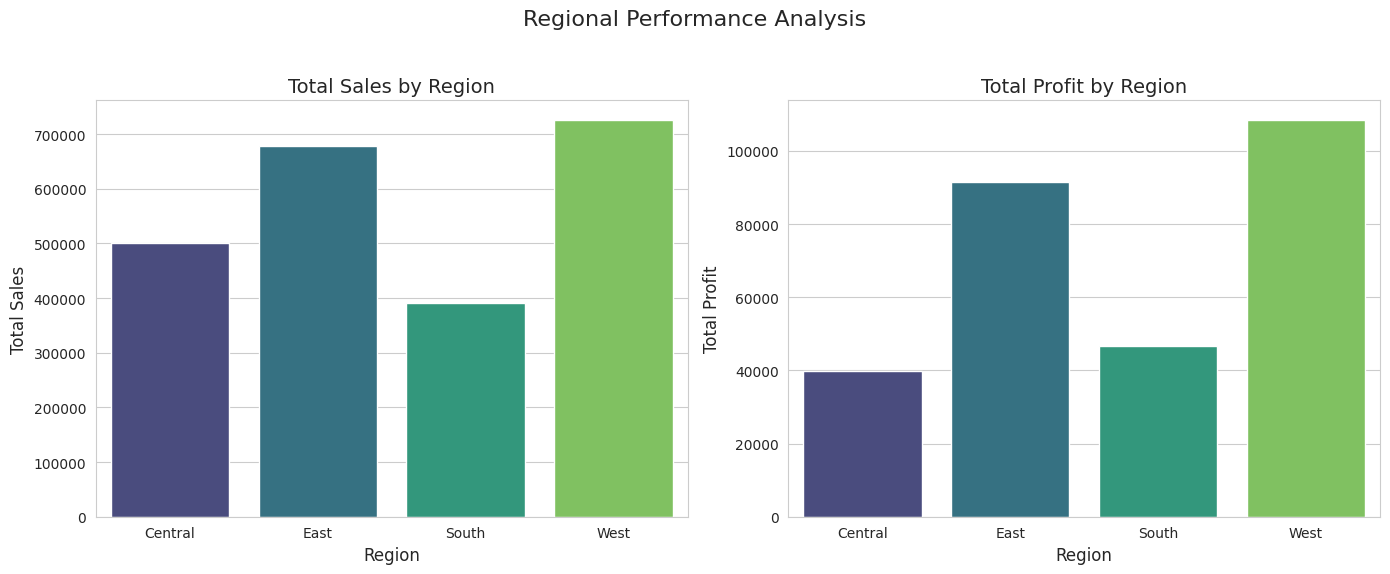

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create the bar chart for sales by region
sns.barplot(x='region', y='sales', hue='region', data=regional_performance, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Total Sales by Region', fontsize=14)
axes[0].set_xlabel('Region', fontsize=12)
axes[0].set_ylabel('Total Sales', fontsize=12)

# Create the bar chart for profit by region
sns.barplot(x='region', y='profit', hue='region', data=regional_performance, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Total Profit by Region', fontsize=14)
axes[1].set_xlabel('Region', fontsize=12)
axes[1].set_ylabel('Total Profit', fontsize=12)

# Set the overall title for the figure
fig.suptitle('Regional Performance Analysis', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

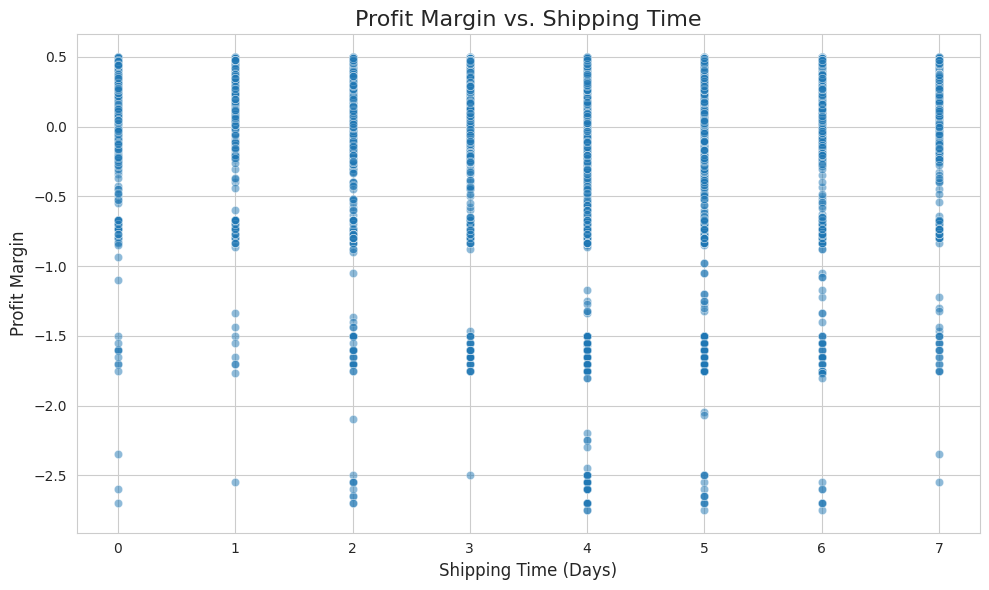

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='profit_margin', data=df, alpha=0.5)
plt.title('Profit Margin vs. Shipping Time', fontsize=16)
plt.xlabel('Shipping Time (Days)', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.tight_layout()
plt.show()

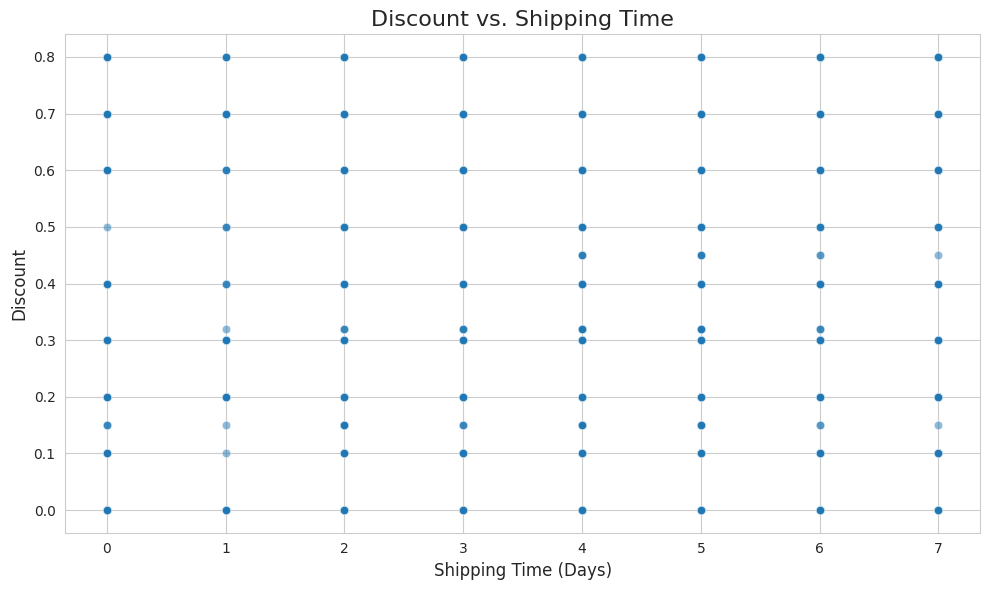

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='discount', data=df, alpha=0.5)
plt.title('Discount vs. Shipping Time', fontsize=16)
plt.xlabel('Shipping Time (Days)', fontsize=12)
plt.ylabel('Discount', fontsize=12)
plt.tight_layout()
plt.show()

## Synthesis of Three Graphs: Regional Performance and Shipping Impact

This synthesis focuses on the insights derived from the regional performance bar charts (Total Sales and Total Profit by Region) and the scatter plots examining the relationship between Shipping Time and Profit Margin, and Shipping Time and Discount.

**1. Regional Performance (Bar Charts):**

The bar charts clearly highlight significant regional disparities in performance. The **West** and **East** regions are the strongest performers in both total sales and total profit, indicating robust market presence and successful operations in these areas. In contrast, the **South** and particularly the **Central** region show considerably lower sales and profit. The Central region's lowest profit suggests potential challenges related to costs, pricing, or product mix despite having higher sales than the South.

**2. Shipping Time and Profit Margin (Scatter Plot):**

The scatter plot of Profit Margin versus Shipping Time does not reveal a strong linear relationship. Profit margins, including negative ones, are distributed across various shipping times. This indicates that while shipping is an operational factor, the *duration* of shipping alone does not appear to be a primary determinant of a sale's profitability. Other factors like product cost, sale price, and applied discounts likely play a more significant role in influencing profit margin.

**3. Shipping Time and Discount (Scatter Plot):**

Similarly, the scatter plot of Discount versus Shipping Time shows no clear correlation. Discounts are applied across a range of shipping durations, suggesting that the level of discount is not systematically tied to how long an order takes to ship. This implies that discounts are likely driven by other strategies, such as promotional campaigns, product-specific considerations, or regional market dynamics, rather than being a direct compensation for shipping time.

**Overall Synthesis:**

The visualizations collectively emphasize the importance of geographic location on overall business performance, with the West and East regions being key drivers of sales and profit. However, the direct relationships between shipping time and both profit margin and discount are not strongly evident in these plots. This suggests that while operational efficiency, including aspects of shipping, is undoubtedly important, its impact on individual transaction profitability or discount application is likely complex and intertwined with other factors not directly captured by shipping duration alone. Further analysis might be needed to explore indirect or more nuanced relationships between shipping logistics and business outcomes.

## Comprehensive Synthesis: Regional Performance, Shipping Impact, and Market Opportunities

This synthesis integrates the findings from the analyses of regional performance, the impact of shipping time, and the identification of market opportunities (expansion and consolidation) in the Superstore dataset.

**1. Regional Performance:**

The analysis of regional sales and profit clearly shows a significant disparity in performance across the four regions. The **West** and **East** regions are the strongest performers in terms of both total sales and total profit, highlighting their crucial role in the Superstore's overall success. The **South** and especially the **Central** region lag significantly in both metrics, with the Central region exhibiting the lowest total profit. This strong geographic variation underscores the importance of tailoring strategies to specific regional markets.

**2. Shipping Time and its Impact:**

The investigation into the impact of shipping time on profitability and potential customer satisfaction (inferred through discounts) did not reveal a strong direct correlation in this dataset. The scatter plots showed that profit margins and discount levels are distributed across various shipping times, suggesting that while efficient shipping is important for overall operations and customer experience, the *duration* of shipping alone, as analyzed here, is not a primary determinant of individual transaction profitability or discount application. Other operational factors and costs within regions or related to specific products are likely more influential on profitability.

**3. Market Opportunities: Expansion and Consolidation:**

Based on the regional performance and profitability analysis (including insights into category performance within regions), potential areas for expansion and consolidation can be identified:

*   **Expansion Opportunities:** The strong performance in the **West** and **East** regions indicates these are prime areas for expansion, focusing on increasing market penetration and investing further in successful product categories within these regions. Additionally, identifying and targeting specific high-performing states within the South and Central regions could offer localized expansion opportunities.
*   **Consolidation or Improvement Areas:** The lower performance in the **South** and **Central** regions, particularly the Central region's low profit, suggests these areas require careful evaluation. Rather than immediate consolidation, the focus should be on understanding the underlying reasons for lower sales and profitability through a detailed analysis of costs, pricing, product mix, and competition within these regions. Consolidation might be a consideration for specific low-profit pockets within these regions if improvement efforts are unsuccessful. Furthermore, consistently low-profit sub-categories across all regions should be re-evaluated for potential optimization or consolidation.

**Overall Conclusion:**

The Superstore's performance is heavily influenced by regional factors, with the West and East regions driving the majority of sales and profit. While the direct impact of shipping *duration* on profitability and discounts is not clearly evident, other operational efficiencies and costs likely contribute to regional performance variations. Strategic decisions regarding expansion should prioritize high-performing regions, while lower-performing areas require thorough investigation and targeted improvement strategies before considering consolidation. Addressing the profitability of specific product categories and sub-categories, especially those with negative margins, is crucial across all locations.

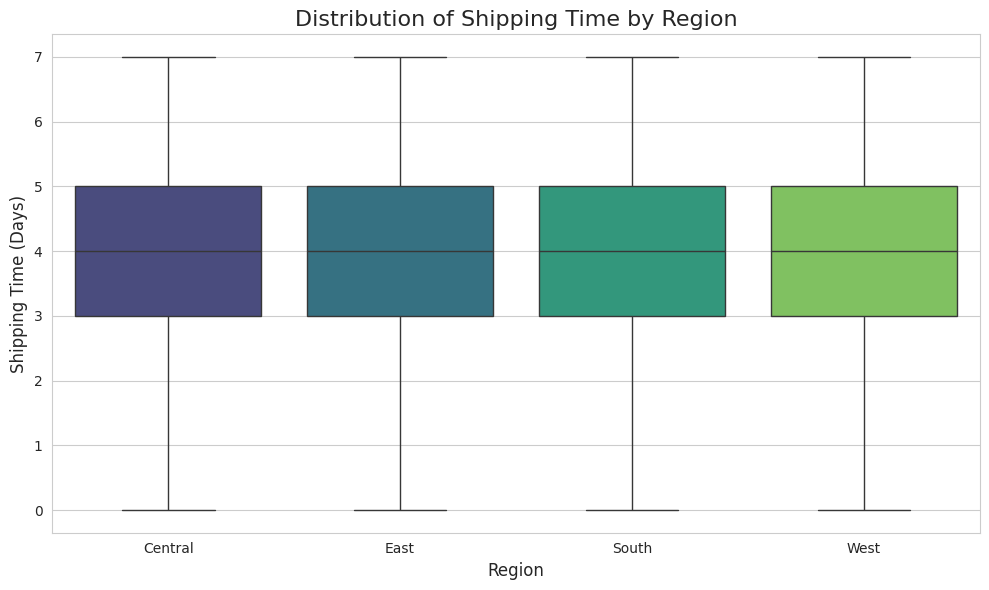

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style('whitegrid')

# Create the box plot of shipping time by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='shipping_time', hue='region', data=df, palette='viridis', legend=False)

# Add titles and labels
plt.title('Distribution of Shipping Time by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Shipping Time (Days)', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Group by region and display descriptive statistics for shipping time
shipping_time_by_region_stats = df.groupby('region')['shipping_time'].describe()
display(shipping_time_by_region_stats)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Central,2323.0,4.057254,1.689174,0.0,3.0,4.0,5.0,7.0
East,2848.0,3.909410,1.728562,0.0,3.0,4.0,5.0,7.0
South,1620.0,3.959259,1.737802,0.0,3.0,4.0,5.0,7.0
West,3203.0,3.930066,1.807951,0.0,3.0,4.0,5.0,7.0
